<a href="https://colab.research.google.com/github/lucasdonizete/RedesNeurais/blob/main/RedeNeural_CIP_RD_TE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# bibliotecas usadas

# Inicialmente é necessário definir as bibliotecas que serão utilizadas para a execução do código corretamente:
import numpy as np
# numpy é a biblioteca numérica do Phyton
import pandas as pd
# pandas é a biblioteca responsável pela manipulação de arquivos
import matplotlib.pyplot as plt
# matplotlib.pyplot é a biblioteca usada para fazer gráficos no Phyton
from sklearn.neural_network import MLPRegressor
# sklearn.neural_network é a biblioteca usada para fazer classificação e regressão, neste caso, ela faz a regressão (MLPRegressor)
from sklearn.model_selection import train_test_split
#separa em treino e teste
from sklearn import preprocessing
#normaliza e retorna os dados
from sklearn.metrics import mean_squared_error
# Essa biblioteca é usada para fazer a soma dos quadrados dos desvios
from sklearn.metrics import r2_score 
# Essa biblioteca foi criada para avaliar se o ajuste está bom através do coeficiente de determinação
from scipy import optimize
#Biblioteca de otimização
from google.colab import files
# Essa biblioteca é usada para carregar arquivos no Phyton

In [17]:
# para gerar o grafico no browser
%matplotlib inline

In [18]:
!git clone https://github.com/lucasdonizete/RedesNeurais
%cd RedesNeurais

Cloning into 'RedesNeurais'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 57 (delta 20), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (57/57), done.
/content/RedesNeurais/RedesNeurais/RedesNeurais/RedesNeurais/RedesNeurais/RedesNeurais/RedesNeurais/RedesNeurais/RedesNeurais/RedesNeurais/RedesNeurais/RedesNeurais/RedesNeurais


In [19]:
# leitura dos dados
df=pd.read_csv("dados-cip.csv")
print(df.head())

  run  t  w  p  c    tr    te   cot   exp   red
0   1  1  1  1 -1  4.90  1.72  3.92  5.79  5.31
1   2  1  1 -1 -1  4.80  1.76  4.15  5.63  5.31
2   3  1 -1  1  1  5.25  1.77  3.46  5.95  6.09
3   4 -1  1 -1  1  5.01  2.24  5.06  5.91  5.05
4   5  1 -1 -1  1  5.57  2.59  4.19  5.61  6.12


In [20]:
# separa as colunas de interesse

Index=[1,2,3,4,6]
X=df.iloc[:,Index].copy()
print(X.head())


   t  w  p  c    te
0  1  1  1 -1  1.72
1  1  1 -1 -1  1.76
2  1 -1  1  1  1.77
3 -1  1 -1  1  2.24
4  1 -1 -1  1  2.59


In [21]:
Index=[ 'te']
y =df[Index]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, shuffle=True, random_state=42)

In [23]:
#Normatiza os dados através da biblioteca pre-processing
scaler_X = preprocessing.MinMaxScaler((-1,1)).fit(X)
scaler_Y = preprocessing.MinMaxScaler((-1,1)).fit(y)

In [24]:
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_Y.transform(y_train)
y_test = scaler_Y.transform(y_test)

In [35]:
HN1 =[]
HN2 = []
train_R2 =[]
test_R2 = []
for i in range(3,20):
  for j in range(3,20):
    ####
    # define a rede neural 
    model = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(i,j),
                         random_state=1,max_iter=500)
    # treina a rede neural
    model.fit(X_train, y_train)
    # usa a rede neural treina em calculos para treino e teste
    y_calc_train=model.predict(X_train)
    y_calc_test=model.predict(X_test)
    # transforma dos dados calculados na forma original (nao normatizado)
    y_obs_train=scaler_Y.inverse_transform(np.array(y_train).reshape(-1,1))
    y_obs_test=scaler_Y.inverse_transform(np.array(y_test).reshape(-1,1))
    y_calc_train=scaler_Y.inverse_transform(y_calc_train.reshape(-1,1))
    y_calc_test=scaler_Y.inverse_transform(y_calc_test.reshape(-1,1))
    mse=mean_squared_error(y_obs_test,y_calc_test)
    R2_teste=r2_score(y_obs_test,y_calc_test)
    R2_treino=r2_score(y_obs_train,y_calc_train)
    #print("i,j=",i,j,"R^2 treino=",R2_treino,"R^2 teste=",R2_teste)
    HN1.append(i)
    HN2.append(j)
    train_R2.append(R2_treino)
    test_R2.append(R2_teste)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when 

In [36]:
#ORGANIZA OS RESULTADOS EM DATAFRAME
df = pd.DataFrame({'camada 1':HN1,'camada 2':HN2,'R2 treino':train_R2,'R2 teste':test_R2})
pd.set_option('display.max_rows', None)
print(df)

     camada 1  camada 2  R2 treino  R2 teste
0           3         3   0.999823  0.952998
1           3         4   0.999863  0.973895
2           3         5   0.999978  0.956089
3           3         6   0.999731  0.985895
4           3         7   0.999917  0.996147
5           3         8   0.999845  0.974424
6           3         9   0.999871  0.978133
7           3        10   0.999926  0.993431
8           3        11   0.999885  0.984914
9           3        12   0.999931  0.985469
10          3        13   0.999890  0.978386
11          3        14   0.999942  0.972758
12          3        15   0.999880  0.985105
13          3        16   0.999906  0.966447
14          3        17   0.999715  0.981132
15          3        18   0.999908  0.981317
16          3        19   0.999872  0.956250
17          4         3   0.999953  0.973377
18          4         4   0.999927  0.982916
19          4         5   0.999868  0.994222
20          4         6   0.999950  0.986096
21        

In [37]:
# define a rede neural 

model = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(13,3), max_iter=500,random_state=1 )

In [38]:
# treina a rede neural
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(13, 3), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=500,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [39]:
# usa a rede neural treina em calculos para treino e teste
y_calc_train=model.predict(X_train)
y_calc_test=model.predict(X_test)

In [40]:
# transforma dos dados calculados na forma original (nao normatizado)
y_obs_train=scaler_Y.inverse_transform(np.array(y_train).reshape(-1,1))
y_obs_test=scaler_Y.inverse_transform(np.array(y_test).reshape(-1,1))
y_calc_train=scaler_Y.inverse_transform(y_calc_train.reshape(-1,1))
y_calc_test=scaler_Y.inverse_transform(y_calc_test.reshape(-1,1))

In [41]:
print(pd.DataFrame({'test calc':y_calc_test.ravel(),'test true':y_obs_test.ravel()}))

   test calc  test true
0   1.315234       1.30
1   1.851465       1.86
2   1.714806       1.72
3   2.577496       2.59
4   2.926579       2.92


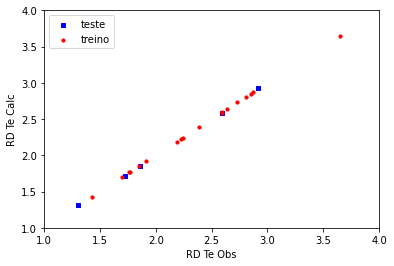

In [42]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(y_obs_test,y_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(y_obs_train,y_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.xlim([1,4])
plt.ylim([1,4])
plt.ylabel('RD Te Calc')
plt.xlabel('RD Te Obs')
plt.show()

In [43]:
mse=mean_squared_error(y_obs_test,y_calc_test)
print("MSE teste=",mse)
R2=r2_score(y_obs_test,y_calc_test)
print("R^2 teste=",R2)

MSE teste= 0.00010630916866292972
R^2 teste= 0.999696620106779


In [44]:
mse=mean_squared_error(y_obs_train,y_calc_train)
print("MSE treino=",mse)
R2=r2_score(y_obs_train,y_calc_train)
print("R^2 treino=",R2)

MSE treino= 1.6299908385930764e-05
R^2 treino= 0.9999437486385816


In [45]:
def function(scaler_X):
  global model
  scaler_X=scaler_X.reshape((1, 5))
  df = pd.DataFrame(scaler_X)
  Y=model.predict(df)
  fun=Y*(-1)
  return fun

In [46]:
bounds = [(-2, 2),(-2, 2),(-2, 2),(-2,2),(0,4)]
Condicoes = optimize.differential_evolution(function,bounds)
#Condicoes=pd.DataFrame(Condicoes.scaler_X.reshape(1, 4))
print(Condicoes)

     fun: array([-2.05986861])
     jac: array([ 4.26325641e-06, -2.74316569e-02,  5.31069411e-02, -1.33226763e-06,
       -5.11720444e-02])
 message: 'Optimization terminated successfully.'
    nfev: 1542
     nit: 19
 success: True
       x: array([ 0.97826192,  2.        , -2.        ,  1.13105918,  4.        ])
